In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
ax = np.array([300, 500, 1000, 2000, 3000, 4000, 5000, 6000])
ay = np.array([9.66, 5.796, 2.898, 1.449, 0.966, 0.7245, 0.5796, 0.483])

df = pd.DataFrame({"Temperature" : ax, "Dominant wavelength in um" : ay })
df

,Temperature,Dominant wavelength in um
0,300,9.6600
1,500,5.7960
2,1000,2.8980
3,2000,1.4490
4,3000,0.9660
5,4000,0.7245
6,5000,0.5796
7,6000,0.4830


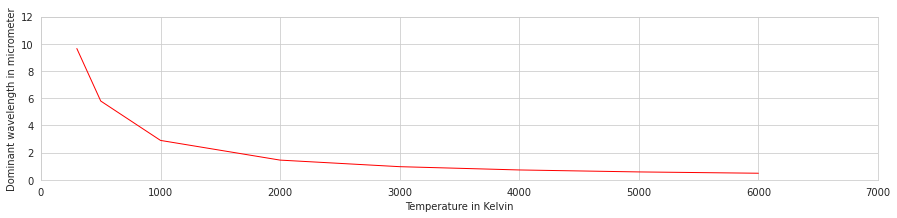

In [ ]:
plt.figure(figsize = (15, 3))
sns.set_style("whitegrid")

plt.plot(df["Temperature"], df["Dominant wavelength in um"], color = "r", lw = 1, alpha = 1)
plt.xlim(0, 7000)
plt.ylim(0, 12)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Dominant wavelength in micrometer")
plt.show()

In [ ]:
# From the graph, find out the temperature at which the dominant wavelength is Red(0.7 micrometer).
# Mathematically calculate the exact temperature in degeree Celcius

In [ ]:
def temperature(Alpha, LambdaMax):
  T = Alpha / LambdaMax
  return T

k = 273.16
def conversion(kelvinVal):
  T = kelvinVal - k
  return T

Alpha = 2898
LambdaMax = 0.7

print("Temperature in kelvin T = {:.0f} kelvin".format(temperature(Alpha, LambdaMax)))
print("Temperature in degree T = {} degree celcius".format(conversion(temperature(Alpha, LambdaMax))))


Temperature in kelvin T = 4140 kelvin
Temperature in degree T = 3866.84 degree celcius


In [ ]:
#Rayleigh scattering class

In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/Python/GIS Lab/Rayleigh scattering class.xlsx")

In [ ]:
df3 = pd.DataFrame({ "Landsat 8 Band no" : [x for x in range(1, 12)], "Band name" : df2.iloc[2:13]["Unnamed: 3"], "Max Wavelevength" : df2.iloc[2:13]["Unnamed: 4"] })
df3

,Landsat 8 Band no,Band name,Max Wavelevength
2,1,Coastal Blue,0.45
3,2,Blue,0.51
4,3,Green,0.59
5,4,Red,0.67
6,5,NIR,0.88
7,6,SWIR1,1.65
8,7,SWIR2,2.29
9,8,Pan,0.68
10,9,Cirrus,1.38
11,10,TIRS1,11.19


In [ ]:
df3["Intensity"] = [1/x**4 for x in df3["Max Wavelevength"] ]
df3

,Landsat 8 Band no,Band name,Max Wavelevength,Intensity
2,1,Coastal Blue,0.45,24.386526
3,2,Blue,0.51,14.781527
4,3,Green,0.59,8.252622
5,4,Red,0.67,4.962503
6,5,NIR,0.88,1.667513
7,6,SWIR1,1.65,0.134916
8,7,SWIR2,2.29,0.036363
9,8,Pan,0.68,4.676967
10,9,Cirrus,1.38,0.275730
11,10,TIRS1,11.19,0.000064


In [ ]:
df3["newColumn"] = [ x / df3["Intensity"].iloc[0] for x in df3["Intensity"]]
df3

,Landsat 8 Band no,Band name,Max Wavelevength,Intensity,newColumn
2,1,Coastal Blue,0.45,24.386526,1.000000
3,2,Blue,0.51,14.781527,0.606135
4,3,Green,0.59,8.252622,0.338409
5,4,Red,0.67,4.962503,0.203494
6,5,NIR,0.88,1.667513,0.068378
7,6,SWIR1,1.65,0.134916,0.005532
8,7,SWIR2,2.29,0.036363,0.001491
9,8,Pan,0.68,4.676967,0.191785
10,9,Cirrus,1.38,0.275730,0.011307
11,10,TIRS1,11.19,0.000064,0.000003


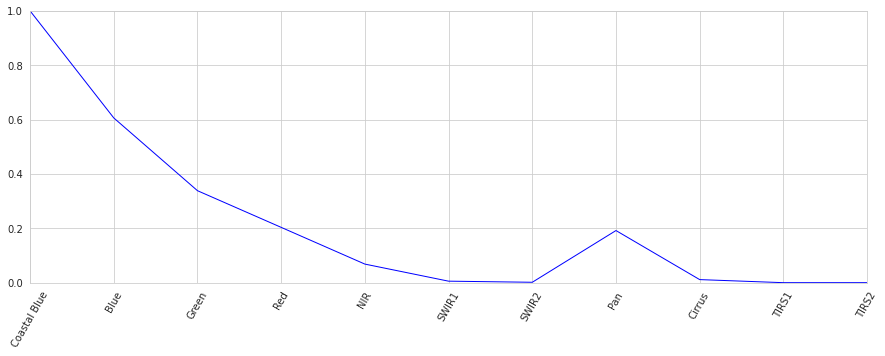

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (15, 5))
plt.plot(df3["Band name"], df3["newColumn"], color = "b", lw = 1)
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
def rfScale(x, y):
  v = y/x
  return v*100

def avgLength(rf, length):
  return (length*rf)/100

def avgWidth(rf, width):
  return (width*rf) /100

def volume(x, y, z):
  v = x * y * z
  return v

avg_depth = 1.3

print("Average length = {}".format(avgLength(rfScale(6.6, 80), 8.3)))
print("Average width = {}".format(avgWidth(rfScale(6.6, 80), 4.2)))
print("Volume = {}".format(volume(avgLength(rfScale(6.6, 80), 8.3), avgWidth(rfScale(6.6, 80), 4.2), avg_depth)))


Average length = 100.6060606060606
Average width = 50.90909090909091
Volume = 6658.292011019283


In [ ]:
Average_length = 100.6060606060606
Average_width = 50.90909090909091
Volume = 6658.292011019283

def water(vol):
  return vol*1000
print("Water = {}".format(water(Volume)))


Water = 6658292.011019283


In [ ]:
def rainFall(x):
  converted = x / 1000
  return converted
print(rainFall(3))

0.003


In [ ]:
def volOfRainFall(length, width , depth):

  return length * width * depth
print("Volume of water = {:.2f} cubic meter".format(volOfRainFall(Average_length, Average_width, rainFall(3))))

Volume of water = 15.37 cubic meter


In [ ]:
vol_water_liter = 15.37*1000
print("volume of water = {} liter".format(vol_water_liter))

volume of water = 15370.0 liter


In [ ]:
#Evaporation

In [ ]:
evap = 1 / 1000
print("Evaporation = {} m".format(evap))

Evaporation = 0.001 m


In [ ]:
def evap_vol(x, y, z):
  v = x * y * z
  return v*1000

volume_evap = evap_vol(Average_length, Average_width, evap)
print("Total evaporaton = {} liter".format(volume_evap))

Total evaporaton = 5121.763085399448 liter


In [ ]:
def netWaterGain(total, evap):
  return total - evap

netWater = netWaterGain(vol_water_liter, volume_evap)
print("Net water gain = {} liter".format(netWater))

Net water gain = 10248.236914600551 liter


In [ ]:
yearly_consumption = 5000 * 100 * 365
Water = 6658292.011019283
def numPonds(consumption, vol):
  num = consumption / vol
  return num

print("Number of ponds required : {}".format(numPonds(yearly_consumption, water(Volume))))

Number of ponds required : 27.40943168277506


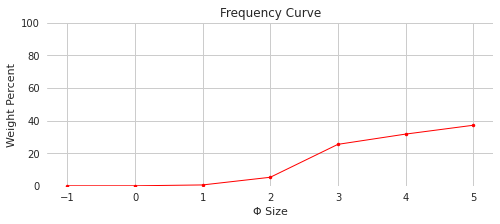

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize = (8, 3))
phi_size = np.array([-1, 0, 1.0, 2.0, 3.0, 4.0, 5])
weight_percentage = np.array([0.00, 0.0, 0.53,5.23,25.42,31.70,37.12])
plt.plot(phi_size, weight_percentage, color = 'r', lw = 1, marker = ".")
#plt.xlim(-2, 6)
plt.ylim(0, 100)
plt.title("Frequency Curve")
plt.xlabel("Φ Size")
plt.ylabel("Weight Percent")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
from scipy.interpolate import make_interp_spline
phi_size = [-1,0,1,2,3,4,5]
weight_percentage = [0, 0.24, 4.63, 25.65, 60.81, 5.91, 2.76]
cum_weight = np.cumsum(weight_percentage)

dataset = pd.DataFrame({"phi-size" : phi_size, "weight-percentage" : weight_percentage, "cum_weight_percentage" : cum_weight })
dataset

,phi-size,weight-percentage,cum_weight_percentage
0,-1,0.00,0.00
1,0,0.24,0.24
2,1,4.63,4.87
3,2,25.65,30.52
4,3,60.81,91.33
5,4,5.91,97.24
6,5,2.76,100.00


No handles with labels found to put in legend.


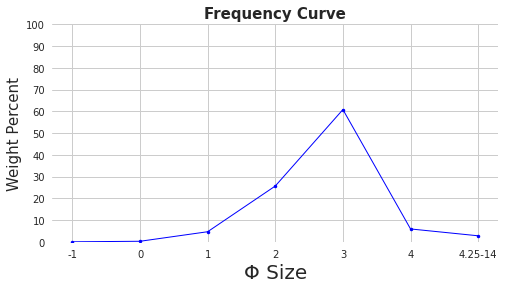

In [ ]:
plt.figure(figsize = (8, 4))
plt.plot(dataset["phi-size"], dataset["weight-percentage"], color = 'b', lw = 1, marker = ".")
plt.title("Frequency Curve", fontsize = 15, fontweight = 'bold')
plt.ylabel("Weight Percent", fontsize = 15)
plt.xlabel("Φ Size", fontsize = 20)
plt.legend()
plt.ylim(0.00, 100.00, 10)
plt.xticks([-1, 0, 1, 2, 3, 4, 5],['-1', '0', '1', '2', '3', '4', '4.25-14'])
plt.yticks(np.arange(0.00, 101.00, 10.00))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

No handles with labels found to put in legend.


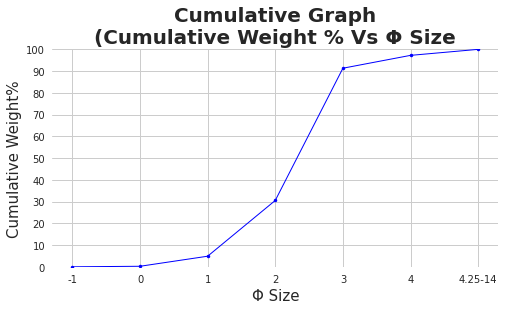

In [ ]:
plt.figure(figsize = (8, 4))
plt.plot(dataset["phi-size"], dataset["cum_weight_percentage"], color = 'b', lw = 1, marker = ".")
plt.title("Cumulative Graph\n(Cumulative Weight % Vs Φ Size", fontsize = 20, fontweight = 'bold')
plt.ylabel("Cumulative Weight%", fontsize = 15)
plt.xlabel("Φ Size", fontsize = 15)
plt.legend()
plt.ylim(0.00, 100.00, 10)
plt.xticks([-1, 0, 1, 2, 3, 4, 5],['-1', '0', '1', '2', '3', '4', '4.25-14'])
plt.yticks(np.arange(0, 101, 10))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()
